In [1]:
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import hamming
from matplotlib import pyplot as plt
import numpy as np
import copy
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv("1000Bnla01.csv")
df.shape

(1000, 51)

In [5]:
df.columns = ['cout'] + [i for i in range(1, 51)]
df.index = ["v" + str(i) for i in range(1000)]


In [6]:
df.head()

cout   1   2  3  4   5   6  7  8   9  ...  41  42  43  44  45  46  47  48  \
v0   703  10   6  7  9   1   7  4  7   8  ...   5   9   6  10   4   2   8  10   
v1   707   7  10  2  1   5   4  8  6   8  ...  10   3   2   5   4   3   8   9   
v2   697  10   2  9  3   5   4  2  6  10  ...   6   5   7   3   1   7   5   8   
v3   672   4   2  6  7  10   1  8  4   2  ...   1   8  10   6   6   5   5   1   
v4   694   1   8  6  7   9  10  8  4   1  ...   5   9   7   6   3   3   8   5   

    49  50  
v0   9   5  
v1   1   1  
v2   4   1  
v3   3  10  
v4   4   5  

[5 rows x 51 columns]

In [7]:
df1 = df.T
df1

v0   v1   v2   v3   v4   v5   v6   v7   v8   v9  ...  v990  v991  v992  \
cout  703  707  697  672  694  704  690  701  683  696  ...   706   666   700   
1      10    7   10    4    1    4    7   10   10    4  ...     7     4     9   
2       6   10    2    2    8    6    4    7    6   10  ...     3     7     4   
3       7    2    9    6    6    7    6    8    6    2  ...    10     5     7   
4       9    1    3    7    7    5   10    4    7    4  ...     6    10     3   
5       1    5    5   10    9    4    7    3    1    7  ...     2     8     8   
6       7    4    4    1   10   10    9    6    5    7  ...     1     6     6   
7       4    8    2    8    8    7    1    4    9    8  ...     7     4     1   
8       7    6    6    4    4    1    8    7    2    9  ...     1     5     8   
9       8    8   10    2    1    4    6    4    3    1  ...     9     1     9   
10      5    6    8    5    7    3    3   10    8    9  ...     4     3    10   
11      8    4    8    7    6    7    7    7    9   10  ...     6     8     5   
12      3    7    5    2    7    8    2    1    7    5  ...     5     9     7   
13      6    3    6    3    8    9    7    6    5    9  ...     7     2    10   
14      4    7    3    2    9    5    8    5    6   10  ...     9     7     2   
15      7    9   10    3    1    8   10   10    7    8  ...     2     9     4   
16      3    2    9    6    2    6    4    2    5    6  ...     4     4     6   
17      5    6    8    7   10    6    4    7    1   10  ...     8     5     7   
18      1    6    3    4   10    9   10    9    9    9  ...     1     9     6   
19      1    5    6   10    2   10    1    2    4    7  ...     5    10     5   
20      2   10    5    7    7    5    4    3    7    3  ...     6     6     8   
21      8    2    9    9    4    9    9    9    8    2  ...     1     4     5   
22      3    5    2    9   10   10    5    4    9    6  ...    10     5     7   
23     10    3    1    1    6    1    2    5    8   10  ...     5     6    10   
24      3    9    3    8    3    4    8    9    2    8  ...     8     7     3   
25      6    6    4    7    2    8    7    4    3    4  ...     2     1     4   
26      7   10    2    5    5   10    3    8    4    5  ...     8     2     9   
27      1    7    9    3    2    2    2    1    2    5  ...     7     4     3   
28      5    4    7    5    1    3    5    2    4    8  ...     4     2     1   
29      8    8    7    4    4    1    2   10    9    6  ...     5     9     2   
30      1    2   10    9    1    6    5    9    6    2  ...     9     1     6   
31      6    4    1    9    6    5    4    5    7    4  ...    10    10     2   
32      2    9    4    8    4    2   10    6   10    3  ...     8     6    10   
33      4    1    6   10    9    6    3    2    1    3  ...     4     2     4   
34      2   10   10    2    3    9    3    5    2    2  ...     6     3     6   
35      9    8    2    6    2    8    8    3   10    1  ...     3    10     4   
36      3    7    9    8    5    3    9    1    6    4  ...     9     8     5   
37     10    3    4    3    9    2    6    7    3    1  ...     1     6     9   
38      9    1    7    9    3    7    1    8    3    2  ...     2    10     2   
39      4    9    1    4   10    5    1    3    5    7  ...    10     7     1   
40      2    5    8    1    8    7    8    6    4    3  ...     5     5     9   
41      5   10    6    1    5    3    9    2    3    6  ...     9     2     2   
42      9    3    5    8    9    8    9    3    8    8  ...     7     1     8   
43      6    2    7   10    7    2    6    8   10    1  ...     8     9     7   
44     10    5    3    6    6    4    2    5    8    9  ...     3     1     1   
45      4    4    1    6    3    2    1    1    2    6  ...    10     7     3   
46      2    3    7    5    3    1    6    9   10    1  ...     2     3     1   
47      8    8    5    5    8    9    5    1    1    7  ...     4     3     5   
48     10    9    8    1    5    3    

In [8]:
df['cout'].value_counts()


710    47
698    46
715    39
708    35
689    34
706    33
717    32
696    31
702    31
716    31
719    31
713    29
704    27
718    27
720    26
714    25
692    24
701    23
694    23
709    23
707    20
703    20
666    19
690    19
695    19
675    18
678    18
705    18
700    17
711    17
683    16
699    16
693    15
697    14
712    14
686    14
687    13
684    11
691     9
682     9
685     8
676     8
688     8
672     7
681     7
679     6
680     5
671     4
674     3
677     2
669     2
668     2
670     2
673     2
667     1
Name: cout, dtype: int64

In [9]:
df2 = df1.drop(['cout'])
columns = ['v' + str(i) for i in range(16,29)]
df2 = df2.drop([c for c in columns], axis = 1)
df2

v0  v1  v2  v3  v4  v5  v6  v7  v8  v9  ...  v990  v991  v992  v993  v994  \
1   10   7  10   4   1   4   7  10  10   4  ...     7     4     9     9     3   
2    6  10   2   2   8   6   4   7   6  10  ...     3     7     4     5    10   
3    7   2   9   6   6   7   6   8   6   2  ...    10     5     7     4     3   
4    9   1   3   7   7   5  10   4   7   4  ...     6    10     3     2     9   
5    1   5   5  10   9   4   7   3   1   7  ...     2     8     8     9     2   
6    7   4   4   1  10  10   9   6   5   7  ...     1     6     6     7    10   
7    4   8   2   8   8   7   1   4   9   8  ...     7     4     1    10     7   
8    7   6   6   4   4   1   8   7   2   9  ...     1     5     8    10     4   
9    8   8  10   2   1   4   6   4   3   1  ...     9     1     9     6     8   
10   5   6   8   5   7   3   3  10   8   9  ...     4     3    10     4     6   
11   8   4   8   7   6   7   7   7   9  10  ...     6     8     5     8     4   
12   3   7   5   2   7   8   2   1   7   5  ...     5     9     7     7     1   
13   6   3   6   3   8   9   7   6   5   9  ...     7     2    10    10    10   
14   4   7   3   2   9   5   8   5   6  10  ...     9     7     2     6     9   
15   7   9  10   3   1   8  10  10   7   8  ...     2     9     4     1     4   
16   3   2   9   6   2   6   4   2   5   6  ...     4     4     6     5     2   
17   5   6   8   7  10   6   4   7   1  10  ...     8     5     7     3     6   
18   1   6   3   4  10   9  10   9   9   9  ...     1     9     6     2     7   
19   1   5   6  10   2  10   1   2   4   7  ...     5    10     5     9     8   
20   2  10   5   7   7   5   4   3   7   3  ...     6     6     8     4     3   
21   8   2   9   9   4   9   9   9   8   2  ...     1     4     5     8    10   
22   3   5   2   9  10  10   5   4   9   6  ...    10     5     7     6     7   
23  10   3   1   1   6   1   2   5   8  10  ...     5     6    10     8     5   
24   3   9   3   8   3   4   8   9   2   8  ...     8     7     3    10     1   
25   6   6   4   7   2   8   7   4   3   4  ...     2     1     4     8     9   
26   7  10   2   5   5  10   3   8   4   5  ...     8     2     9     9     6   
27   1   7   9   3   2   2   2   1   2   5  ...     7     4     3     5     9   
28   5   4   7   5   1   3   5   2   4   8  ...     4     2     1     9     3   
29   8   8   7   4   4   1   2  10   9   6  ...     5     9     2     1     8   
30   1   2  10   9   1   6   5   9   6   2  ...     9     1     6    10     4   
31   6   4   1   9   6   5   4   5   7   4  ...    10    10     2     2     1   
32   2   9   4   8   4   2  10   6  10   3  ...     8     6    10     1     5   
33   4   1   6  10   9   6   3   2   1   3  ...     4     2     4     6     3   
34   2  10  10   2   3   9   3   5   2   2  ...     6     3     6     3     5   
35   9   8   2   6   2   8   8   3  10   1  ...     3    10     4     5     6   
36   3   7   9   8   5   3   9   1   6   4  ...     9     8     5     7     8   
37  10   3   4   3   9   2   6   7   3   1  ...     1     6     9     3     4   
38   9   1   7   9   3   7   1   8   3   2  ...     2    10     2     2     7   
39   4   9   1   4  10   5   1   3   5   7  ...    10     7     1     5     2   
40   2   5   8   1   8   7   8   6   4   3  ...     5     5     9     4    10   
41   5  10   6   1   5   3   9   2   3   6  ...     9     2     2     7     1   
42   9   3   5   8   9   8   9   3   8   8  ...     7     1     8     7     5   
43   6   2   7  10   7   2   6   8  10   1  ...     8     9     7     2     6   
44  10   5   3   6   6   4   2   5   8   9  ...     3     1     1     1     9   
45   4   4   1   6   3   2   1   1   2   6  ...    10     7     3     8     2   
46   2   3   7   5   3   1   6   9  10   1  ...     2     3     1     4     8   
47   8   8   5   5   8   9   5   1   1   7  ...     4     3     5     6     5   
48  10   9   8   1   5   3   3   8   4   3  ...     3     3    10     3     7   
49   9   1   4   3   4   1   5  10 

In [11]:
l = df2.columns
Hamming_distance = []
for x in l :
    L = []
    for y in l :
        L.append(hamming(df2[x].values, df2[y].values) * 50)
    Hamming_distance.append(L)


In [12]:
distance_df = pd.DataFrame(Hamming_distance)
distance_df.to_csv("distances entres vestieurs")

In [13]:
distance_df.head()

0     1     2     3     4     5     6     7     8     9    ...   977  \
0   0.0  45.0  46.0  45.0  43.0  46.0  46.0  45.0  44.0  46.0  ...  47.0   
1  45.0   0.0  45.0  47.0  45.0  45.0  45.0  46.0  45.0  44.0  ...  45.0   
2  46.0  45.0   0.0  46.0  44.0  45.0  43.0  43.0  47.0  47.0  ...  46.0   
3  45.0  47.0  46.0   0.0  42.0  42.0  41.0  46.0  42.0  42.0  ...  46.0   
4  43.0  45.0  44.0  42.0   0.0  47.0  44.0  48.0  44.0  45.0  ...  45.0   

    978   979   980   981   982   983   984   985   986  
0  46.0  45.0  47.0  46.0  48.0  47.0  44.0  45.0  47.0  
1  45.0  47.0  45.0  42.0  46.0  44.0  45.0  44.0  42.0  
2  48.0  44.0  46.0  43.0  46.0  46.0  41.0  45.0  46.0  
3  47.0  44.0  48.0  45.0  44.0  42.0  41.0  44.0  44.0  
4  44.0  43.0  46.0  46.0  44.0  48.0  41.0  45.0  45.0  

[5 rows x 987 columns]

## motivation de ce choix

# Analyse des sous sequences

## 1- Choix des voisins

In [14]:
min_i = L.index(min(L))
distances_sol_op = Hamming_distance[min_i]
distances_sol_op

[47.0,
 42.0,
 46.0,
 44.0,
 45.0,
 43.0,
 44.0,
 46.0,
 44.0,
 46.0,
 46.0,
 44.0,
 47.0,
 45.0,
 42.0,
 46.0,
 46.0,
 45.0,
 41.0,
 47.0,
 41.0,
 44.0,
 43.0,
 47.0,
 41.0,
 43.0,
 45.0,
 44.0,
 46.0,
 43.0,
 43.0,
 45.0,
 48.0,
 45.0,
 46.0,
 43.0,
 43.0,
 46.0,
 46.0,
 45.0,
 42.0,
 43.0,
 42.0,
 46.0,
 45.0,
 45.0,
 48.0,
 40.0,
 45.0,
 47.0,
 48.0,
 43.0,
 44.0,
 45.0,
 43.0,
 43.0,
 46.0,
 47.0,
 41.0,
 42.0,
 47.0,
 47.0,
 42.0,
 46.0,
 48.0,
 42.0,
 41.0,
 46.0,
 47.0,
 46.0,
 46.0,
 44.0,
 45.0,
 47.0,
 45.0,
 45.0,
 45.0,
 46.0,
 43.0,
 44.0,
 46.0,
 43.0,
 47.0,
 42.0,
 45.0,
 46.0,
 44.0,
 43.0,
 44.0,
 45.0,
 44.0,
 47.0,
 42.0,
 47.0,
 44.0,
 46.0,
 44.0,
 45.0,
 44.0,
 37.0,
 48.0,
 47.0,
 45.0,
 43.0,
 46.0,
 43.0,
 46.0,
 45.0,
 48.0,
 45.0,
 47.0,
 45.0,
 43.0,
 47.0,
 46.0,
 44.0,
 48.0,
 42.0,
 45.0,
 43.0,
 45.0,
 44.0,
 47.0,
 46.0,
 48.0,
 46.0,
 44.0,
 47.0,
 46.0,
 47.0,
 46.0,
 44.0,
 45.0,
 43.0,
 45.0,
 45.0,
 44.0,
 47.0,
 46.0,
 45.0,
 47.0,
 45.0,
 38.0,

In [15]:
def get_neighbors(k) :
    L =  copy.deepcopy(distances_sol_op)
    M = []
    max_v = max(L)
    for i in range(k) :
        min_v = min(L)
        indice = L.index(min_v)
        M.append(indice)
        L[indice] = max_v
    return M

In [16]:
neighbors = get_neighbors(5)
neighbors

[986, 630, 99, 410, 710]

In [17]:
def split_list(string) :
    length = len(string)
    splited_list = []
    for i in range(length) :
        for j in range(i+1, length) :
            if len(string[i:j+1]) > 1 :
                splited_list.append(string[i:j+1])
    return splited_list


In [18]:
def get_similar_subsequences(arr1,arr2, length) :
    common_sequences = []
    i = 0
    while i < length :
        seq = []
        while i < length and arr1[i] == arr2[i] :
            seq.append(arr1[i])
            i = i + 1
        if len(seq) > 1 :
            L = split_list(seq)
            for x in L :
                common_sequences.append(x)
        i = i + 1
    return common_sequences


In [20]:
get_similar_subsequences(df2['v2'].values, df2['v12'].values, 50)

[]

In [21]:
def get_vectors_similar_subs() :
    similar_subs_matrix = []
    length = len(df2['v0'].values)
    for i in range(5) :
        vi = 'v' + str(neighbors[i])
        for j in range(i + 1, 5) :
            vj = 'v' + str(neighbors[j])
            similar_subs_matrix.append(get_similar_subsequences(df2[vi].values, df2[vj].values, length))
    return similar_subs_matrix

In [23]:
L = get_vectors_similar_subs()

In [24]:
L

[[], [[3, 1]], [], [], [], [], [], [[2, 6]], [[7, 6]], []]

In [25]:
sub_sequences = []
for x in L :
    for y in x :
        if y not in sub_sequences :
            sub_sequences.append(y)

sub_sequences

[[3, 1], [2, 6], [7, 6]]

In [26]:
def count_occurence(x,T) :
    cmpt = 0;
    for y in T :
        for z in y :
            if z == x :
                cmpt = cmpt + 1
    return cmpt



In [27]:
frequences = {}
for x in sub_sequences :
    frequences[str(x)] = count_occurence(x,L)


In [28]:
frequences 

{'[3, 1]': 1, '[2, 6]': 1, '[7, 6]': 1}

In [29]:
x = list(frequences.keys())
y = list(frequences.values()) 
y = [(x / 50) * 100 for x in y]
y

[2.0, 2.0, 2.0]

<AxesSubplot:>

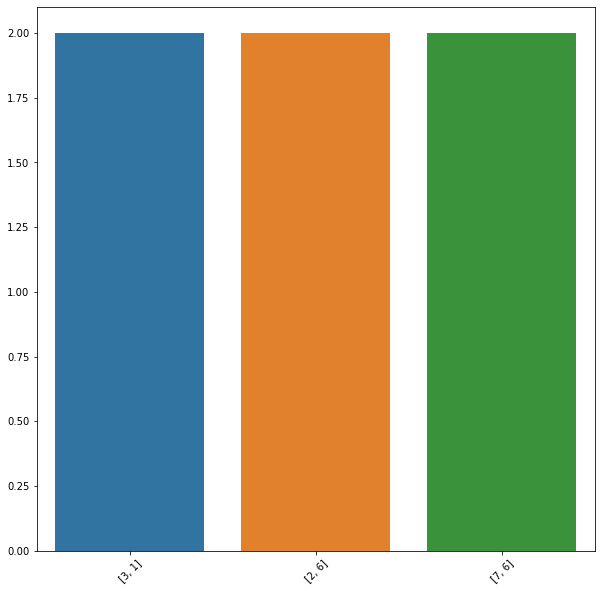

In [30]:
fig, ax = plt.subplots(figsize = (10,10))
plt.xticks(rotation=45)
sns.barplot(x,y, ax = ax)